<a href="https://colab.research.google.com/github/Celestial00/Sales_Prediction_ML/blob/main/Sales_Forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
DF = pd.read_csv('Store.csv')
DF.head(10)

# check for Null values

# DF.info()

# Dropping the unwanted Columns

Store_Data = DF.drop(['store', 'item'], axis=1)
Store_Data['date'] = pd.to_datetime(Store_Data['date'])


#Converting the Date from to month period and suming the total item solved

Store_Data['date'] = Store_Data['date'].dt.to_period('M')
Monthly_Sales = Store_Data.groupby('date').sum().reset_index()

Monthly_Sales['date'] = Monthly_Sales['date'].dt.to_timestamp()

Monthly_Sales.head(10)

NameError: ignored

Visualization

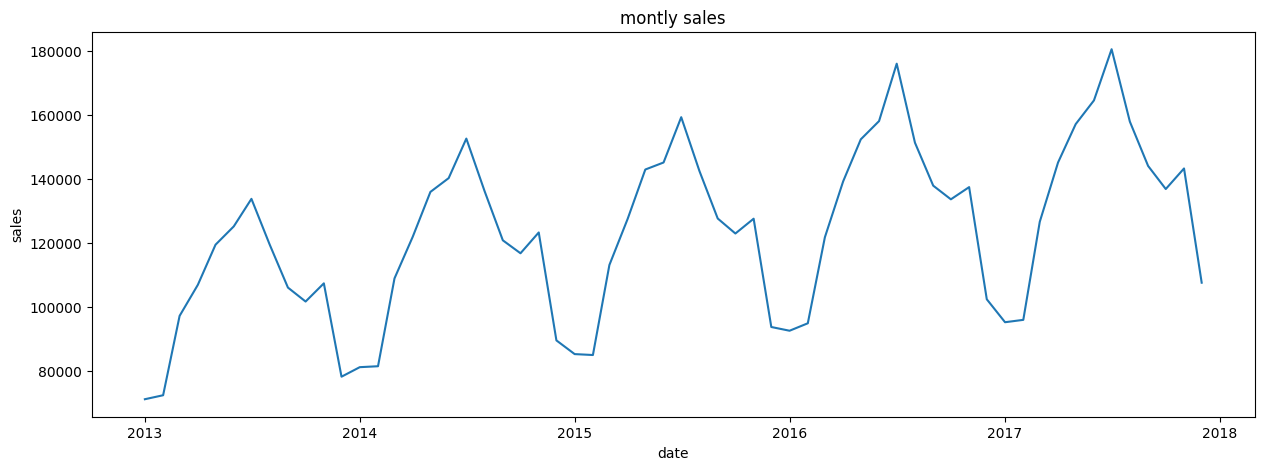

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Monthly_Sales['date'], Monthly_Sales['sales'])
plt.xlabel('date')
plt.ylabel('sales')
plt.title('montly sales')
plt.show()

In [ ]:
# check the difference to train the model accurately

Monthly_Sales['sales_diff'] = Monthly_Sales['sales'].diff()
Monthly_Sales = Monthly_Sales.dropna()

Monthly_Sales.head(10)



,date,sales,sales_diff
1,2013-02-01,72299.0,1246.0
2,2013-03-01,97134.0,24835.0
3,2013-04-01,106857.0,9723.0
4,2013-05-01,119405.0,12548.0
5,2013-06-01,125133.0,5728.0
6,2013-07-01,133756.0,8623.0
7,2013-08-01,119446.0,-14310.0
8,2013-09-01,105988.0,-13458.0
9,2013-10-01,101621.0,-4367.0
10,2013-11-01,107315.0,5694.0


In [ ]:
#Model Training Data

supervised_data = Monthly_Sales.drop(['sales', 'date'], axis=1)



In [ ]:
for i in range(1,13):
  col_name = 'month_' + str(i)
  supervised_data[col_name] = supervised_data['sales_diff'].shift(i)

supervised_data = supervised_data.dropna().reset_index(drop=True)
supervised_data.head(10)

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,294.0,2980.0,-29213.0,5694.0,-4367.0,-13458.0,-14310.0,8623.0,5728.0,12548.0,9723.0,24835.0,1246.0
1,27486.0,294.0,2980.0,-29213.0,5694.0,-4367.0,-13458.0,-14310.0,8623.0,5728.0,12548.0,9723.0,24835.0
2,13035.0,27486.0,294.0,2980.0,-29213.0,5694.0,-4367.0,-13458.0,-14310.0,8623.0,5728.0,12548.0,9723.0
3,14030.0,13035.0,27486.0,294.0,2980.0,-29213.0,5694.0,-4367.0,-13458.0,-14310.0,8623.0,5728.0,12548.0
4,4313.0,14030.0,13035.0,27486.0,294.0,2980.0,-29213.0,5694.0,-4367.0,-13458.0,-14310.0,8623.0,5728.0
5,12372.0,4313.0,14030.0,13035.0,27486.0,294.0,2980.0,-29213.0,5694.0,-4367.0,-13458.0,-14310.0,8623.0
6,-16440.0,12372.0,4313.0,14030.0,13035.0,27486.0,294.0,2980.0,-29213.0,5694.0,-4367.0,-13458.0,-14310.0
7,-15394.0,-16440.0,12372.0,4313.0,14030.0,13035.0,27486.0,294.0,2980.0,-29213.0,5694.0,-4367.0,-13458.0
8,-4054.0,-15394.0,-16440.0,12372.0,4313.0,14030.0,13035.0,27486.0,294.0,2980.0,-29213.0,5694.0,-4367.0
9,6513.0,-4054.0,-15394.0,-16440.0,12372.0,4313.0,14030.0,13035.0,27486.0,294.0,2980.0,-29213.0,5694.0


In [ ]:
# Spliting the Data into testing and training Data

train_data = supervised_data[:-12]
test_data = supervised_data[-12:]


Scaler = MinMaxScaler(feature_range=(-1,1))
Scaler.fit(train_data)
train_data = Scaler.transform(train_data)
test_data = Scaler.transform(test_data)

x_train , y_train = train_data[:,1:], train_data[:,0:1]
x_test , y_test = test_data[:,1:], test_data[:,0:1]

y_train = y_train.ravel()
y_test = y_test.ravel()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(35, 12)
(35,)
(12, 12)
(12,)


In [ ]:
sales_dates = Monthly_Sales['date'][-12:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)
act_sales = Monthly_Sales['sales'][-13:].to_list()
act_sales

[102328.0,
 95148.0,
 95888.0,
 126586.0,
 145118.0,
 157139.0,
 164559.0,
 180577.0,
 157925.0,
 144055.0,
 136828.0,
 143264.0,
 107515.0]

In [ ]:
# model

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_pre = lr_model.predict(x_test)

In [ ]:
lr_pre = lr_pre.reshape(-1,1)
lr_pre_test_set = np.concatenate([lr_pre, x_test], axis=1)
lr_pre_test_set = Scaler. inverse_transform(lr_pre_test_set)


In [ ]:
result_list = []
for i in range(0, len(lr_pre_test_set)):
  result_list.append(lr_pre_test_set[i][0] + act_sales[i])

lr_pre_series = pd.Series(result_list, name="Linear Prediction")
predict_df = predict_df.merge(lr_pre_series, left_index = True, right_index = True )

In [ ]:
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'], Monthly_Sales['sales'][-12:]))
lr_mae = mean_absolute_error(predict_df['Linear Prediction'], Monthly_Sales['sales'][-12:])
lr_r2 = r2_score(predict_df['Linear Prediction'], Monthly_Sales['sales'][-12:])

print("Mean Squared Error:", lr_mse)
print("Mean Absolute Error:", lr_mae)
print("R-squared Score:", lr_r2)


Mean Squared Error: 2783.7697169627077
Mean Absolute Error: 2146.5694284813594
R-squared Score: 0.9884794298950289


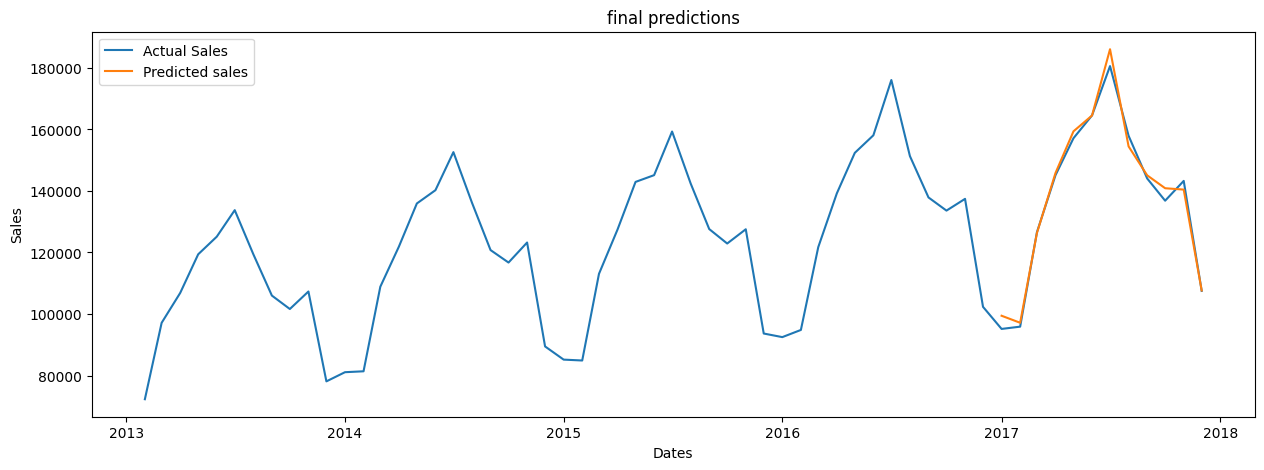

In [ ]:
# predictions visulizations

plt.figure(figsize=(15,5))
plt.plot(Monthly_Sales['date'], Monthly_Sales['sales'])
plt.plot(predict_df['date'],predict_df['Linear Prediction'])
plt.title("final predictions")
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.legend(['Actual Sales', 'Predicted sales'])
plt.show()